In [1]:
import pandas as pd
import pathlib
from collections import defaultdict
import re

In [2]:
tsv_dir = pathlib.Path('housing_characteristics').resolve()

# Weather filenames to zipcode

In [3]:
zipcode_wx = pd.read_csv(
    '/Users/nmerket/projects/hescore/OpenStudio-HEScore/resources/zipcodes_wx.csv',
    dtype={'postal_code': 'str'},
    usecols=['postal_code', 'nearest_weather_station', 'weather_filename', 'distance_to_weather_station']
)
zipcode_wx

,postal_code,nearest_weather_station,distance_to_weather_station,weather_filename
0,01001,744915,12.985829,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
1,01008,744915,20.037976,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
2,01011,744915,26.976707,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
3,01012,744915,27.876558,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
4,01027,744915,15.418265,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
...,...,...,...,...
41527,96942,704140,5421.230305,USA_AK_Shemya.AFB.704140_TMY3.epw
41528,96943,704140,5792.697927,USA_AK_Shemya.AFB.704140_TMY3.epw
41529,96950,704140,4859.936624,USA_AK_Shemya.AFB.704140_TMY3.epw
41530,96951,704140,4984.862348,USA_AK_Shemya.AFB.704140_TMY3.epw


# County to Zipcode

From options lookup

In [4]:
county_to_zipcode = {}
with open('../resources/options_lookup.tsv', 'r') as f:
    for line in f:
        if line.startswith('County\t'):
            county, zipcode = re.search(r'County\s"(.+)"\s.*site_zip_code=(\d+)', line).groups()
            county_to_zipcode[county] = zipcode

Weather stations not in the county zipcode mapping.

In [5]:
set(zipcode_wx['weather_filename']).difference(
    zipcode_wx.loc[zipcode_wx['postal_code'].isin(county_to_zipcode.values()), 'weather_filename']
)

{'USA_AK_Adak.NAS.704540_TMY3.epw',
 'USA_AK_Ambler.701718_TMY3.epw',
 'USA_AK_Anaktuvuk.Pass.701625_TMY3.epw',
 'USA_AK_Anchorage-Elmendorf.AFB.702720_TMY3.epw',
 'USA_AK_Anchorage-Lake.Hood.Seaplane.Base.702725_TMY3.epw',
 'USA_AK_Anchorage.Intl.AP.702730_TMY3.epw',
 'USA_AK_Aniak.AP.702320_TMY3.epw',
 'USA_AK_Anvik.702075_TMY3.epw',
 'USA_AK_Bettles.Field.701740_TMY3.epw',
 'USA_AK_Birchwood.702746_TMY3.epw',
 'USA_AK_Cold.Bay.AP.703160_TMY3.epw',
 'USA_AK_Cordova.702960_TMY3.epw',
 'USA_AK_Deadhorse.700637_TMY3.epw',
 'USA_AK_Dillingham.AWOS.703210_TMY3.epw',
 'USA_AK_Eielson.AFB.702650_TMY3.epw',
 'USA_AK_Emmonak.702084_TMY3.epw',
 'USA_AK_Gambell.702040_TMY3.epw',
 'USA_AK_Gulkana.702710_TMY3.epw',
 'USA_AK_Gustavus.703670_TMY3.epw',
 'USA_AK_Hayes.River.702495_TMY3.epw',
 'USA_AK_Homer.AP.703410_TMY3.epw',
 'USA_AK_Huslia.702225_TMY3.epw',
 'USA_AK_Hydaburg.Seaplane.Base.703884_TMY3.epw',
 'USA_AK_Kake.Seaplane.Base.703855_TMY3.epw',
 'USA_AK_McGrath.AP.702310_TMY3.epw',
 'USA_A

## County to HEScore weather station

In [6]:
county_zipcode_wx = pd.Series(county_to_zipcode).reset_index().rename(columns={'index': 'county', 0: 'zipcode'}).merge(zipcode_wx, how='left', left_on='zipcode', right_on='postal_code')
assert not county_zipcode_wx['weather_filename'].isna().any()
county_zipcode_wx.sample(10)


,county,zipcode,postal_code,nearest_weather_station,distance_to_weather_station,weather_filename
2249,"PA, Berks County",19606,19606,725103,10.362700,USA_PA_Reading.Mem.AP-Spaatz.Field.725103_TMY3...
754,"IL, Massac County",62960,62960,724350,20.180561,USA_KY_Paducah-Barkley.Rgnl.AP.724350_TMY3.epw
1080,"KY, Morgan County",41472,41472,724236,38.672681,USA_KY_Jackson-Julian.Carroll.AP.724236_TMY3.epw
770,"IL, Pulaski County",62964,62964,723489,33.293936,USA_MO_Cape.Girardeau.Muni.AP.723489_TMY3.epw
881,"IN, Warren County",47993,47993,724386,30.597464,USA_IN_Lafayette-Purdue.University.AP.724386_T...
2011,"NY, New York County",10025,10025,725033,0.711847,USA_NY_New.York-Central.Park.725033_TMY3.epw
1133,"LA, Franklin Parish",71295,71295,722486,52.225330,USA_LA_Monroe.Rgnl.AP.722486_TMY3.epw
1615,"MT, Glacier County",59427,59427,727796,23.708894,USA_MT_Cut.Bank.Muni.AP.727796_TMY3.epw
1756,"ND, Benson County",58348,58348,727573,52.764813,USA_ND_Devils.Lake.AWOS.727573_TMY3.epw
1053,"KY, Knox County",40906,40906,724243,27.115305,USA_KY_London-Corbin-Magee.Field.724243_TMY3.epw


# County

In [7]:
cty_filename = tsv_dir / 'County.tsv'

In [8]:
cty = pd.read_csv(cty_filename, sep='\t', comment='#')

In [9]:
cty

,Dependency=County and PUMA,"Option=AK, Aleutians East Borough","Option=AK, Aleutians West Census Area","Option=AK, Anchorage Municipality","Option=AK, Bethel Census Area","Option=AK, Bristol Bay Borough","Option=AK, Denali Borough","Option=AK, Dillingham Census Area","Option=AK, Fairbanks North Star Borough","Option=AK, Haines Borough",...,"Option=WY, Sheridan County","Option=WY, Sublette County","Option=WY, Sweetwater County","Option=WY, Teton County","Option=WY, Uinta County","Option=WY, Washakie County","Option=WY, Weston County",source_count,source_weight,sampling_probability
0,"G0100010, G01002100",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1887,22714.0,0.000169
1,"G0100030, G01002600",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8628,107579.0,0.000802
2,"G0100050, G01002400",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1820,11802.0,0.000088
3,"G0100070, G01001700",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1777,8972.0,0.000067
4,"G0100090, G01000800",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2750,23850.0,0.000178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540,"G5600370, G56000500",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,5305,19102.0,0.000142
4541,"G5600390, G56000100",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2501,13292.0,0.000099
4542,"G5600410, G56000500",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2652,8768.0,0.000065
4543,"G5600430, G56000200",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1902,3811.0,0.000028


In [10]:
cty_option_cols = list(filter(lambda x: x.startswith("Option="), cty.columns))
cty_deps_cols = list(filter(lambda x: x.startswith("Dependency="), cty.columns))
cty_extra_cols = sorted(set(cty.columns.values).difference(cty_option_cols).difference(cty_deps_cols), key=list(cty.columns.values).index)


Each county/puma maps to a single county.

In [11]:
s = cty.set_index(cty_deps_cols)[cty_option_cols].rename(columns=lambda x: x.replace('Option=', '')).unstack()
ctypuma_to_cty = dict(reversed(x) for x in s[s>0].index.values)
ctypuma_to_cty

{'G0200130, G02000400': 'AK, Aleutians East Borough',
 'G0200160, G02000400': 'AK, Aleutians West Census Area',
 'G0200200, G02000101': 'AK, Anchorage Municipality',
 'G0200200, G02000102': 'AK, Anchorage Municipality',
 'G0200500, G02000400': 'AK, Bethel Census Area',
 'G0200600, G02000400': 'AK, Bristol Bay Borough',
 'G0200680, G02000300': 'AK, Denali Borough',
 'G0200700, G02000400': 'AK, Dillingham Census Area',
 'G0200900, G02000300': 'AK, Fairbanks North Star Borough',
 'G0201000, G02000300': 'AK, Haines Borough',
 'G0201050, G02000400': 'AK, Hoonah-Angoon Census Area',
 'G0201100, G02000300': 'AK, Juneau City and Borough',
 'G0201220, G02000200': 'AK, Kenai Peninsula Borough',
 'G0201300, G02000300': 'AK, Ketchikan Gateway Borough',
 'G0201500, G02000400': 'AK, Kodiak Island Borough',
 'G0201580, G02000400': 'AK, Kusilvak Census Area',
 'G0201640, G02000400': 'AK, Lake and Peninsula Borough',
 'G0201700, G02000200': 'AK, Matanuska-Susitna Borough',
 'G0201800, G02000400': 'AK, 

This reverse mapping, is for each county, there can be one or more county/pumas.

In [12]:
cty_to_ctypuma = defaultdict(list)
for k, v in ctypuma_to_cty.items():
    cty_to_ctypuma[v].append(k)

This is a mapping of hescore weather stations to county/puma. There can be one ore more county/puma at each weather station.

In [13]:
wx_to_ctypuma = defaultdict(list)
for _, row in county_zipcode_wx.iterrows():
    wx_to_ctypuma[row['weather_filename']].extend(cty_to_ctypuma[row['county']])

This is the reverse: county/puma -> weather station. 1-to-1.

In [14]:
wx_to_ctypuma
ctypuma_to_wx = {}
for k, v in wx_to_ctypuma.items():
    for x in v:
        ctypuma_to_wx[x] = k

# County and PUMA

In [15]:
county_and_puma_filename = tsv_dir / "County and PUMA.tsv"

In [16]:
cty_puma = pd.read_csv(county_and_puma_filename, sep='\t', comment='#')

In [17]:
cty_puma_option_cols = list(filter(lambda x: x.startswith("Option="), cty_puma.columns))
cty_puma_deps_cols = list(filter(lambda x: x.startswith("Dependency="), cty_puma.columns))
cty_puma_extra_cols = sorted(set(cty_puma.columns.values).difference(cty_puma_option_cols).difference(cty_puma_deps_cols), key=list(cty_puma.columns.values).index)
cty_puma_extra_cols

['source_count', 'source_weight', 'sampling_probability']

In [18]:
df = cty_puma.set_index(cty_puma_deps_cols)[cty_puma_option_cols].rename(columns=lambda x: x.replace('Option=', ''))
df

,"G0100010, G01002100","G0100030, G01002600","G0100050, G01002400","G0100070, G01001700","G0100090, G01000800","G0100110, G01002400","G0100130, G01002300","G0100150, G01001100","G0100170, G01001800","G0100190, G01001000",...,"G5600270, G56000200","G5600290, G56000100","G5600310, G56000200","G5600330, G56000100","G5600350, G56000500","G5600370, G56000500","G5600390, G56000100","G5600410, G56000500","G5600430, G56000200","G5600450, G56000200"
Dependency=ASHRAE IECC Climate Zone 2004,,,,,,,,,,,,,,,,,,,,,
1A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2A,0.00000,0.004115,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3A,0.00155,0.000000,0.001107,0.001107,0.001938,0.001292,0.002584,0.00155,0.001292,0.001938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3C,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4C,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
# new_rows = []
# for cz, row in df.iterrows():
#     print(cz)
#     cps = row[row>0].index.values
#     ctys = set(map(ctypuma_to_cty.get, cps))
#     n_ctys = len(ctys)
#     cty_wt = 1 / n_ctys
#     new_row = {}
#     for cty in ctys:
#         n_cp = len(cty_to_ctypuma[cty])
#         cp_wt = cty_wt / n_cp
#         for cp in cty_to_ctypuma[cty]:
#             new_row[cp] = cp_wt
#     new_rows.append(new_row)

### Reweight the county/pumas

Each row is the probability that a house will fall in that county/puma for that climate zone. We want to change that to be even for each weather station rather than by population. 

In [21]:
new_rows = []
for cz, row in df.iterrows():
    print(cz)
    # The list of county/pumas in this climate zone.
    cps = row[row>0].index.values
    # The list of weather stations in this climate zone.
    wxs = set(map(ctypuma_to_wx.get, cps))
    # The number of weather stations in the climate zone.
    n_wxs = len(wxs)
    # Every weather station gets the same weight.
    wx_wt = 1 / n_wxs
    new_row = {}
    for wx in wxs:
        # How many county/pumas map to the weather station
        n_cp = len(wx_to_ctypuma[wx])
        # The weight for each county/puma is the weather station weight split across the county/pumas
        cp_wt = wx_wt / n_cp
        for cp in wx_to_ctypuma[wx]:
            new_row[cp] = cp_wt
    new_rows.append(new_row)

1A
2A
2B
3A
3B
3C
4A
4B
4C
5A
5B
6A
6B
7A
7AK
7B
8AK


In [22]:
df2 = pd.DataFrame(new_rows, index=df.index).fillna(0.0).sort_index(axis=1)
df2.head()

,"G0100010, G01002100","G0100030, G01002600","G0100050, G01002400","G0100070, G01001700","G0100090, G01000800","G0100110, G01002400","G0100130, G01002300","G0100150, G01001100","G0100170, G01001800","G0100190, G01001000",...,"G5600270, G56000200","G5600290, G56000100","G5600310, G56000200","G5600330, G56000100","G5600350, G56000500","G5600370, G56000500","G5600390, G56000100","G5600410, G56000500","G5600430, G56000200","G5600450, G56000200"
Dependency=ASHRAE IECC Climate Zone 2004,,,,,,,,,,,,,,,,,,,,,
1A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2A,0.00000,0.004115,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3A,0.00155,0.000000,0.001107,0.001107,0.001938,0.001292,0.002584,0.00155,0.001292,0.001938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
assert df2.shape == df.shape
assert (df2.index == df.index).all()
assert (df2.columns == df.columns).all()

### Reweight the climate zones

Set the weights of climate zones by the number of weather stations in each, rather than the population.

In [32]:
county_zipcode_wx

,county,zipcode,postal_code,nearest_weather_station,distance_to_weather_station,weather_filename
0,"AK, Aleutians East Borough",99661,99661,703165,11.706181,USA_AK_Sand.Point.703165_TMY3.epw
1,"AK, Aleutians West Census Area",99685,99685,704890,12.294963,USA_AK_Unalaska-Dutch.Harbor.Field.704890_TMY3...
2,"AK, Anchorage Municipality",99501,99501,702735,0.696105,USA_AK_Anchorage-Merrill.Field.702735_TMY3.epw
3,"AK, Bethel Census Area",99545,99545,702190,108.771718,USA_AK_Bethel.AP.702190_TMY3.epw
4,"AK, Bristol Bay Borough",99633,99633,703260,17.251318,USA_AK_King.Salmon.AP.703260_TMY3.epw
...,...,...,...,...,...,...
3137,"WY, Sweetwater County",82901,82901,725744,8.314463,USA_WY_Green.River-Greater.Green.River.Interga...
3138,"WY, Teton County",83001,83001,725776,23.931572,USA_WY_Jackson.Hole.AP.725776_TMY3.epw
3139,"WY, Uinta County",82930,82930,725775,18.058013,USA_WY_Evanston-Uinta.County.AP-Burns.Field.72...
3140,"WY, Washakie County",82401,82401,726665,11.864699,USA_WY_Worland.Muni.AP.726665_TMY3.epw


In [33]:
cty_to_cz = {}
s = df.unstack()
for cp, cz in s[s>0].index.values:
    cty_to_cz[ctypuma_to_cty[cp]] = cz

In [38]:
county_zipcode_wx['cz'] = county_zipcode_wx['county'].map(cty_to_cz)
assert not county_zipcode_wx['cz'].isna().any()

In [42]:
n_wx_in_cz = county_zipcode_wx.groupby('cz')['weather_filename'].nunique()
cz_weights = n_wx_in_cz / n_wx_in_cz.sum()
cz_weights

cz
1A     0.008216
2A     0.076291
2B     0.010563
3A     0.116197
3B     0.042254
3C     0.010563
4A     0.144366
4B     0.019953
4C     0.026995
5A     0.185446
5B     0.073944
6A     0.137324
6B     0.056338
7A     0.046948
7AK    0.021127
7B     0.012911
8AK    0.010563
Name: weather_filename, dtype: float64

In [43]:
cty_puma

,Dependency=ASHRAE IECC Climate Zone 2004,"Option=G0100010, G01002100","Option=G0100030, G01002600","Option=G0100050, G01002400","Option=G0100070, G01001700","Option=G0100090, G01000800","Option=G0100110, G01002400","Option=G0100130, G01002300","Option=G0100150, G01001100","Option=G0100170, G01001800",...,"Option=G5600330, G56000100","Option=G5600350, G56000500","Option=G5600370, G56000500","Option=G5600390, G56000100","Option=G5600410, G56000500","Option=G5600430, G56000200","Option=G5600450, G56000200",source_count,source_weight,sampling_probability
0,1A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90212.0,2404990.0,0.017940
1,2A,0.00000,0.004115,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1054460.0,15541700.0,0.115935
2,2B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172788.0,2646700.0,0.019743
3,3A,0.00155,0.000000,0.001107,0.001107,0.001938,0.001292,0.002584,0.00155,0.001292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1677690.0,17836000.0,0.133050
4,3B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,744533.0,12455400.0,0.092912
5,3C,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143860.0,3142860.0,0.023445
6,4A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2080990.0,28862300.0,0.215302
7,4B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172990.0,1036340.0,0.007731
8,4C,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256926.0,3860830.0,0.028800
9,5A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2408170.0,30211600.0,0.225367


In [44]:
cty_puma2 = cty_puma[cty_puma_deps_cols + cty_puma_extra_cols].merge(df2.rename(columns='Option={}'.format), left_on=cty_puma_deps_cols, right_index=True).reindex(columns=cty_puma_deps_cols + cty_puma_option_cols + cty_puma_extra_cols)
cty_puma2

,Dependency=ASHRAE IECC Climate Zone 2004,"Option=G0100010, G01002100","Option=G0100030, G01002600","Option=G0100050, G01002400","Option=G0100070, G01001700","Option=G0100090, G01000800","Option=G0100110, G01002400","Option=G0100130, G01002300","Option=G0100150, G01001100","Option=G0100170, G01001800",...,"Option=G5600330, G56000100","Option=G5600350, G56000500","Option=G5600370, G56000500","Option=G5600390, G56000100","Option=G5600410, G56000500","Option=G5600430, G56000200","Option=G5600450, G56000200",source_count,source_weight,sampling_probability
0,1A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90212.0,2404990.0,0.017940
1,2A,0.00000,0.004115,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1054460.0,15541700.0,0.115935
2,2B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172788.0,2646700.0,0.019743
3,3A,0.00155,0.000000,0.001107,0.001107,0.001938,0.001292,0.002584,0.00155,0.001292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1677690.0,17836000.0,0.133050
4,3B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,744533.0,12455400.0,0.092912
5,3C,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143860.0,3142860.0,0.023445
6,4A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2080990.0,28862300.0,0.215302
7,4B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172990.0,1036340.0,0.007731
8,4C,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256926.0,3860830.0,0.028800
9,5A,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2408170.0,30211600.0,0.225367


In [45]:
cty_puma2.to_csv(county_and_puma_filename, sep='\t', index=False)

# ASHRAE Climate Zone

Weight the climate zones by the number of counties in each.

In [46]:
cz_filename = tsv_dir / 'ASHRAE IECC Climate Zone 2004.tsv'

In [47]:
cz = pd.read_csv(cz_filename, sep='\t', comment='#')

In [48]:
cz

,Option=1A,Option=2A,Option=2B,Option=3A,Option=3B,Option=3C,Option=4A,Option=4B,Option=4C,Option=5A,Option=5B,Option=6A,Option=6B,Option=7A,Option=7AK,Option=7B,Option=8AK,source_count,source_weight,sampling_probability
0,0.002546,0.070656,0.006365,0.183641,0.034691,0.004456,0.234564,0.018141,0.012094,0.196053,0.04774,0.107575,0.039784,0.027371,0.006365,0.005092,0.002864,11078300.0,134055000.0,1


In [49]:
cz_option_cols = list(filter(lambda x: x.startswith('Option='), cz.columns.values))
cz_option_cols

['Option=1A',
 'Option=2A',
 'Option=2B',
 'Option=3A',
 'Option=3B',
 'Option=3C',
 'Option=4A',
 'Option=4B',
 'Option=4C',
 'Option=5A',
 'Option=5B',
 'Option=6A',
 'Option=6B',
 'Option=7A',
 'Option=7AK',
 'Option=7B',
 'Option=8AK']

In [50]:
cz.loc[0, cz_option_cols] = cz_weights.rename(index=lambda x: f"Option={x}")

In [51]:
cz

,Option=1A,Option=2A,Option=2B,Option=3A,Option=3B,Option=3C,Option=4A,Option=4B,Option=4C,Option=5A,Option=5B,Option=6A,Option=6B,Option=7A,Option=7AK,Option=7B,Option=8AK,source_count,source_weight,sampling_probability
0,0.008216,0.076291,0.010563,0.116197,0.042254,0.010563,0.144366,0.019953,0.026995,0.185446,0.073944,0.137324,0.056338,0.046948,0.021127,0.012911,0.010563,11078300.0,134055000.0,1


In [52]:
cz.to_csv(cz_filename, sep='\t', index=False)

# Run Sampling

To see how it shakes out

In [63]:
! openstudio ../resources/run_sampling.rb -p "project_national" -n 550000 -o hescore_buildstock.csv

Sampling project_national/ASHRAE IECC Climate Zone 2004...
Sampling project_national/Bathroom Spot Vent Hour...
Sampling project_national/County and PUMA...
Sampling project_national/AIANNH Area...
Sampling project_national/CEC Climate Zone...
Sampling project_national/City...
Sampling project_national/County...
Sampling project_national/AHS Region...
Sampling project_national/ASHRAE IECC Climate Zone 2004 - 2A Split...
Sampling project_national/Building America Climate Zone...
Sampling project_national/Dehumidifier...
Sampling project_national/Door Area...
Sampling project_national/Doors...
Sampling project_national/Eaves...
Sampling project_national/Electric Vehicle...
Sampling project_national/Energystar Climate Zone 2023...
Sampling project_national/Ground Thermal Conductivity...
Sampling project_national/HVAC Secondary Heating Efficiency...
Sampling project_national/HVAC Secondary Heating Fuel...
Sampling project_national/HVAC Secondary Heating Partial Space Conditioning...
Sampli

In [64]:
bstk = pd.read_csv('../resources/hescore_buildstock.csv')

/var/folders/qt/5nrnlf6148z2jxyxx_5yqgl0z8pq2p/T/ipykernel_79798/2368512335.py:1: DtypeWarning: Columns (125) have mixed types. Specify dtype option on import or set low_memory=False.
  bstk = pd.read_csv('../resources/hescore_buildstock.csv')


In [65]:
bstk.groupby('County').size().sort_values(ascending=False)

County
IL, Lake County           950
TX, Travis County         910
CA, Sacramento County     900
NY, Erie County           889
ID, Ada County            875
                         ... 
TX, Grayson County         13
TX, San Jacinto County     11
TX, Walker County          11
TX, Waller County          11
TX, Austin County          11
Length: 3142, dtype: int64

In [66]:
bstk.groupby('County').size().describe()

count    3142.000000
mean      175.047740
std       152.088034
min        11.000000
25%        71.000000
50%       129.000000
75%       210.000000
max       950.000000
dtype: float64

In [67]:
bstk['zipcode'] = bstk['County'].map(county_to_zipcode)

In [68]:
bstk2 = bstk.merge(zipcode_wx, how='left', left_on='zipcode', right_on='postal_code')

<Axes: xlabel='weather_filename'>

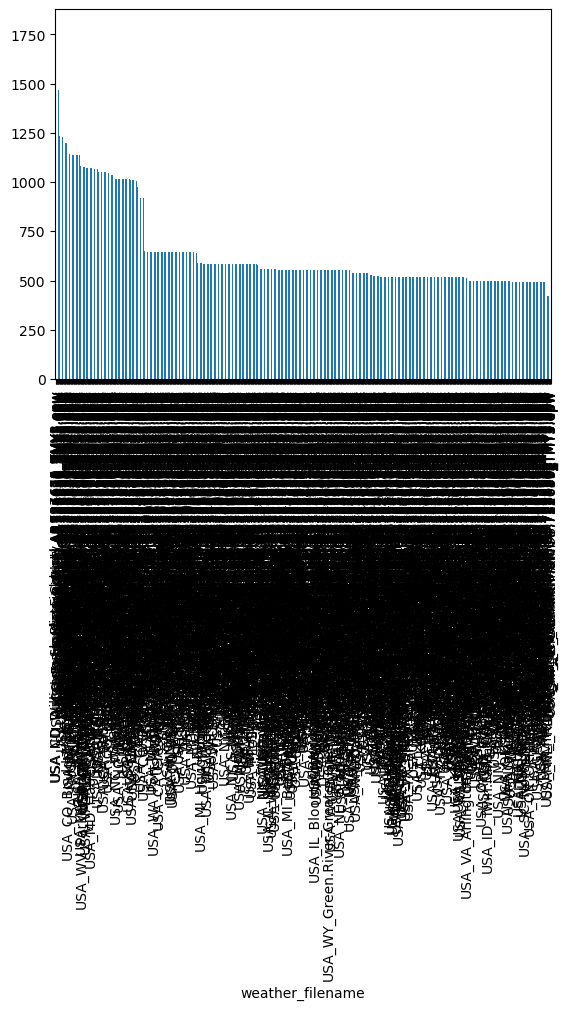

In [69]:
bstk2.groupby('weather_filename').size().sort_values(ascending=False).plot.bar()

In [70]:
bstk2.groupby('weather_filename').size().sort_values(ascending=True)

weather_filename
USA_NM_Clovis.Muni.AWOS.722689_TMY3.epw                    420
USA_TX_Amarillo.Intl.AP.723630_TMY3.epw                    420
USA_TX_Dalhart.Muni.AP.722636_TMY3.epw                     420
USA_AZ_Scottsdale.Muni.AP.722789_TMY3.epw                  422
USA_NM_Ruidoso-Sierra.Blanca.Rgnl.AP.722683_TMY3.epw       422
                                                          ... 
USA_CA_Bishop.AP.724800_TMY3.epw                          1473
USA_NE_Chadron.Muni.AP.725636_TMY3.epw                    1692
USA_CO_Eagle.County.Rgnl.AP.724675_TMY3.epw               1694
USA_CO_Durango-La.Plata.County.AP.724625_TMY3.epw         1696
USA_ND_Williston-Sloulin.Field.Intl.AP.727670_TMY3.epw    1788
Length: 852, dtype: int64

In [71]:
set(zipcode_wx['weather_filename']).difference(bstk2['weather_filename'])

{'USA_AK_Adak.NAS.704540_TMY3.epw',
 'USA_AK_Ambler.701718_TMY3.epw',
 'USA_AK_Anaktuvuk.Pass.701625_TMY3.epw',
 'USA_AK_Anchorage-Elmendorf.AFB.702720_TMY3.epw',
 'USA_AK_Anchorage-Lake.Hood.Seaplane.Base.702725_TMY3.epw',
 'USA_AK_Anchorage.Intl.AP.702730_TMY3.epw',
 'USA_AK_Aniak.AP.702320_TMY3.epw',
 'USA_AK_Anvik.702075_TMY3.epw',
 'USA_AK_Bettles.Field.701740_TMY3.epw',
 'USA_AK_Birchwood.702746_TMY3.epw',
 'USA_AK_Cold.Bay.AP.703160_TMY3.epw',
 'USA_AK_Cordova.702960_TMY3.epw',
 'USA_AK_Deadhorse.700637_TMY3.epw',
 'USA_AK_Dillingham.AWOS.703210_TMY3.epw',
 'USA_AK_Eielson.AFB.702650_TMY3.epw',
 'USA_AK_Emmonak.702084_TMY3.epw',
 'USA_AK_Gambell.702040_TMY3.epw',
 'USA_AK_Gulkana.702710_TMY3.epw',
 'USA_AK_Gustavus.703670_TMY3.epw',
 'USA_AK_Hayes.River.702495_TMY3.epw',
 'USA_AK_Homer.AP.703410_TMY3.epw',
 'USA_AK_Huslia.702225_TMY3.epw',
 'USA_AK_Hydaburg.Seaplane.Base.703884_TMY3.epw',
 'USA_AK_Kake.Seaplane.Base.703855_TMY3.epw',
 'USA_AK_McGrath.AP.702310_TMY3.epw',
 'USA_A

In [72]:
bstk2.groupby('weather_filename').size().describe()

count     852.000000
mean      645.539906
std       220.087136
min       420.000000
25%       518.000000
50%       554.000000
75%       645.000000
max      1788.000000
dtype: float64